## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn import tree

## Reading the data

In [2]:
credit_data = pd.read_csv("credit_risk_dataset.csv")

## Column description

In [3]:
strings = ["person_age : age",            
"person_income : Annual income",    
"person_home_ownership :  Home ownership",   
"person_emp_length : Employment length (in years)",   
"loan_intent : loan intent",         
"loan_grade : loan grade",          
"loan_amnt : loan amount",          
"loan_int_rate : interest rate", 
"loan_status : loan status(0 is non default, 1 is default)",                
"loan_percent_income : percentage of income",      
"cb_person_default_on_file : historical default", 
"cb_person_cred_hist_length : credit history length"]  

columns_list = []
description_list = []

for string in strings:
    temp_list = string.split(" : ")
    columns_list.append(temp_list[0])
    description_list.append(temp_list[1])
description_table = pd.DataFrame({"columns":columns_list, "description":description_list})
description_table

,columns,description
0,person_age,age
1,person_income,Annual income
2,person_home_ownership,Home ownership
3,person_emp_length,Employment length (in years)
4,loan_intent,loan intent
5,loan_grade,loan grade
6,loan_amnt,loan amount
7,loan_int_rate,interest rate
8,loan_status,"loan status(0 is non default, 1 is default)"
9,loan_percent_income,percentage of income


In [4]:
credit_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


Based on the result of info(), we can observe that there are 32581 values in each column other than "person_emp_length" and "loan_int_rate"

## Finding the missing value

In [6]:
# checking whether there is any missing value in each column
credit_data.isnull().any()

person_age                    False
person_income                 False
person_home_ownership         False
person_emp_length              True
loan_intent                   False
loan_grade                    False
loan_amnt                     False
loan_int_rate                  True
loan_status                   False
loan_percent_income           False
cb_person_default_on_file     False
cb_person_cred_hist_length    False
dtype: bool

Given this result, we need to handle the missing value in "person_emp_length" and "loan_int_rate"

### person_emp_length

In [7]:
# by using isnull(), we can sure that there are 895 missing values in "person_emp_length"
credit_data[credit_data["person_emp_length"].isnull()]["person_emp_length"]

105     NaN
222     NaN
379     NaN
407     NaN
408     NaN
         ..
32285   NaN
32328   NaN
32360   NaN
32453   NaN
32471   NaN
Name: person_emp_length, Length: 895, dtype: float64

In [8]:
# replace NaN into 0
credit_data["person_emp_length"].fillna(0, inplace = True)

In this case, I would replace NaN into 0, then regard 0 as not providing employment length.

### loan_int_rate

In [9]:
# by using isnull(), we can sure that there are 3116 missing values in "loan_int_rate"
credit_data[credit_data["loan_int_rate"].isnull()]["loan_int_rate"]

39      NaN
50      NaN
57      NaN
59      NaN
62      NaN
         ..
32547   NaN
32552   NaN
32553   NaN
32569   NaN
32570   NaN
Name: loan_int_rate, Length: 3116, dtype: float64

In [10]:
# removed all rows without loan interest rate
credit_data = credit_data[~ credit_data["loan_int_rate"].isnull()]

I would remove all of rows which do not include loan interest rate because I think interest rate is very important factor for us to evaluate the credit default of customers.

## Checking the data type

### cb_person_default_on_file

For cb_person_defalut_on_file, to help us to make the predictive model, I would like to change Y and N into 0,1.

In [11]:
credit_data["cb_person_default_on_file"].value_counts()

cb_person_default_on_file
N    24252
Y     5213
Name: count, dtype: int64

In [12]:
credit_data.loc[credit_data["cb_person_default_on_file"] == "Y","cb_person_default_on_file"] = 1
credit_data.loc[credit_data["cb_person_default_on_file"] == "N","cb_person_default_on_file"] = 0

In [13]:
credit_data["cb_person_default_on_file"]

0        1
1        0
2        0
3        0
4        1
        ..
32576    0
32577    0
32578    0
32579    0
32580    0
Name: cb_person_default_on_file, Length: 29465, dtype: object

## Summary of data

In [14]:
credit_data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,29465.000000,2.946500e+04,29465.000000,29465.000000,29465.000000,29465.000000,29465.000000,29465.000000
mean,27.714712,6.602047e+04,4.654268,9584.744612,11.011695,0.219379,0.170110,5.788257
std,6.300193,6.190142e+04,4.171572,6316.272282,3.240459,0.413833,0.106879,4.031987
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.910000e+04,7.000000,12250.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


### Numerical data

In this part, I am trying to create box plots to identify outliers in my data.

In [15]:
boxplot_columns = credit_data.iloc[:, [0, 1, 3, 6, 7, 11]].columns

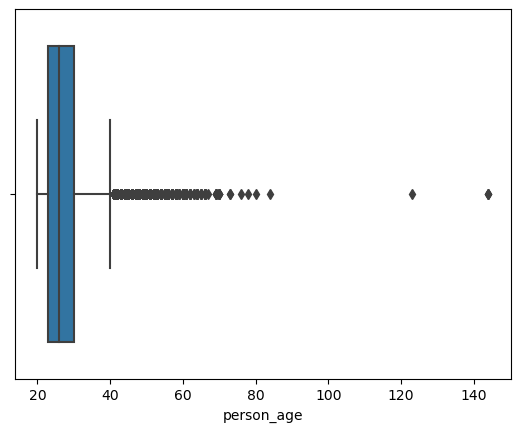

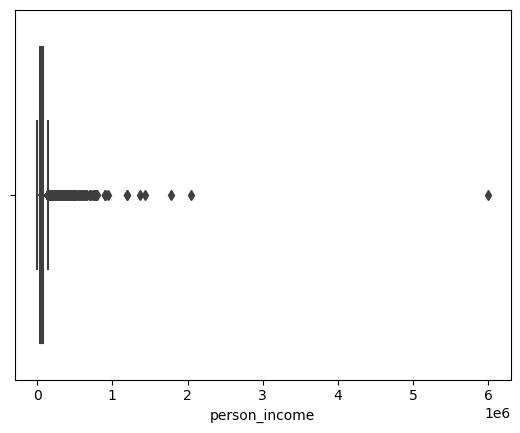

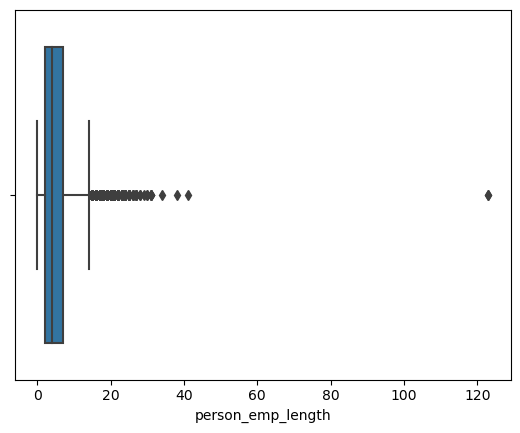

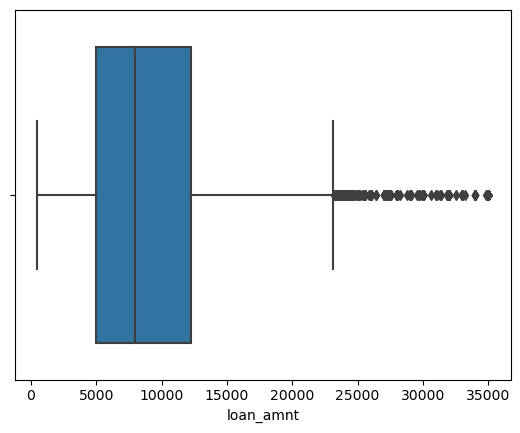

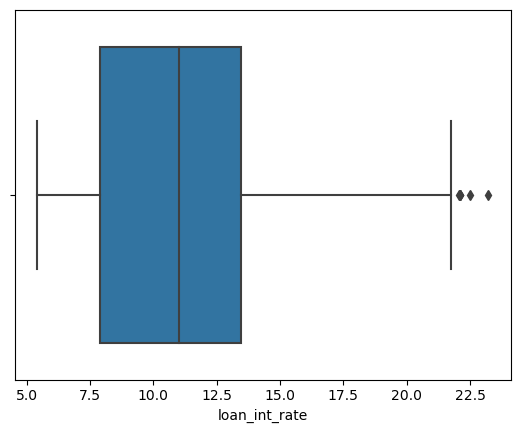

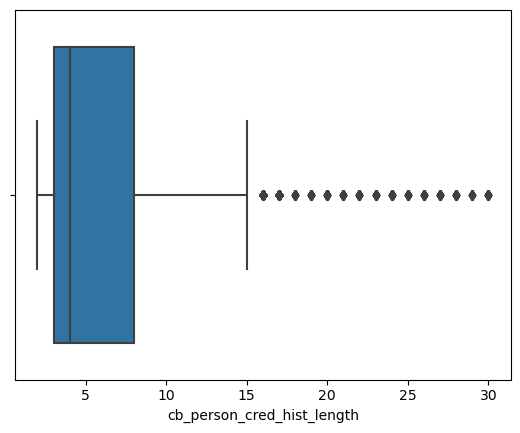

In [16]:
for col in boxplot_columns:
    sns.boxplot(x = credit_data[col])
    plt.show()
    print("\n")

Based on these plots, I would like to focus on "person_age" and "person_emp_length". 
For person_age, I consider that the age more than 120 is not reasonable, and for person_emp_length, the employment length more than 120 is also not a proper data. Therefore, I will remove these kinds of data in my dataframe.

In [17]:
credit_data = credit_data[(credit_data["person_age"] < 120) & (credit_data["person_emp_length"] < 120)]

### Categorical data

I create bar charts to view the distribution of the categorize data

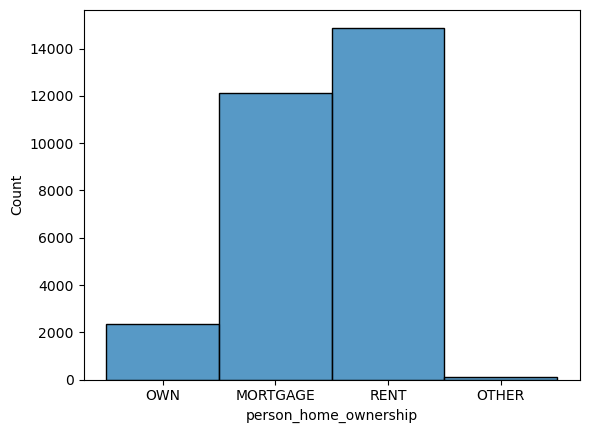

C:\Users\ah881\AppData\Local\Temp\ipykernel_3000\1235847514.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  hist_plot.set_xticklabels(hist_plot.get_xticklabels(), rotation=40, ha="right")


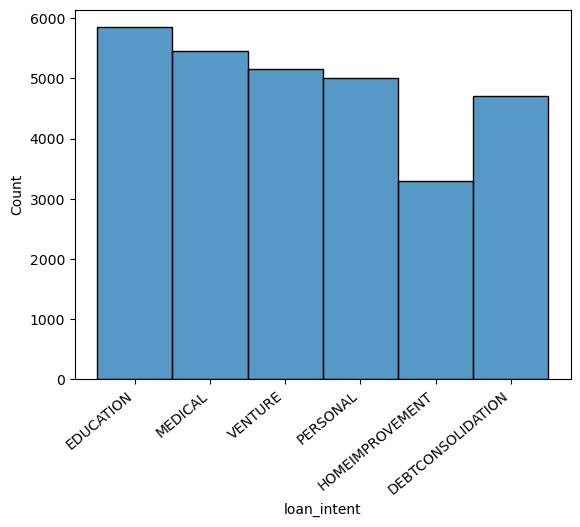

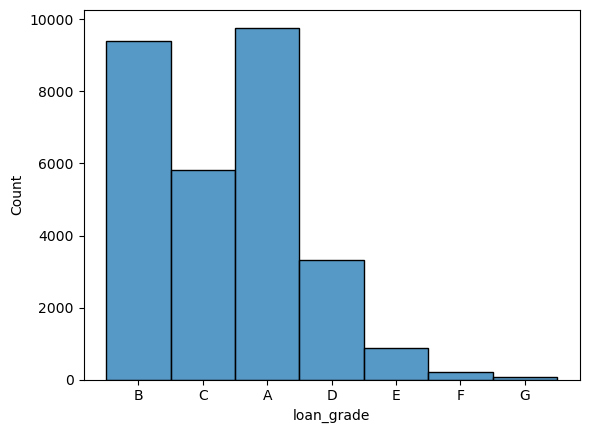

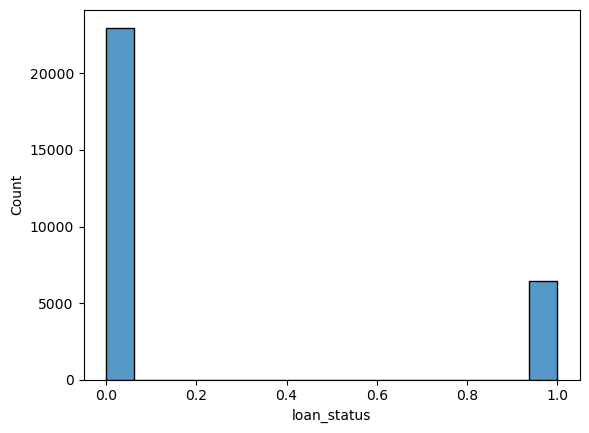

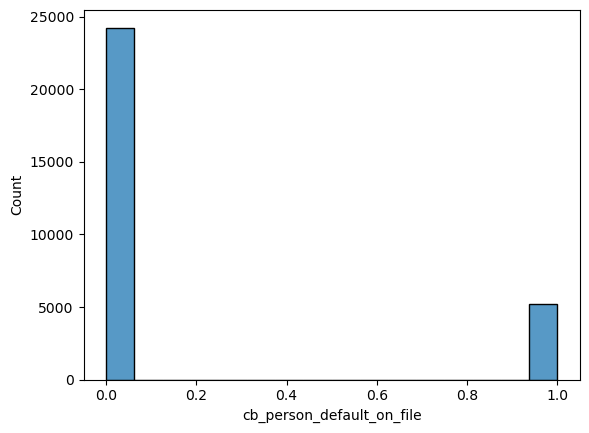

In [18]:
histo_columns = credit_data.iloc[:, [2, 4, 5, 8, 10]].columns

for col in histo_columns:
    hist_plot = sns.histplot(x = credit_data[col])
    if col == "loan_intent":
        hist_plot.set_xticklabels(hist_plot.get_xticklabels(), rotation=40, ha="right")
    plt.show()

## Using label encoding to convert categorical data variables into a form that can provide decision tree to do a better job

In [19]:
# using label encoding method to handle the categorical data
# created a function for categorical_data
def creating_dictionary_for_categorical_data(column_name):
    values_list = []
    keys_list = []
    
    # found how many labels do I need
    for i in range(0, credit_data[column_name].nunique()):
        values_list.append(i)
    
    # Extracts and stores unique values from each column
    for i in credit_data[column_name].unique():
        keys_list.append(i)
    keys_list.sort()
    
    # created the dictionary for data frame
    dict_categorical_data = dict(zip(keys_list, values_list))
    for key, value in dict_categorical_data.items():
        print(f"{key} : {value}")
    
    # used map() to convert categorical data variables
    credit_data[column_name] = credit_data[column_name].map(dict_categorical_data)

In [20]:
# showed which labels correspond to each value
categorical_data_list = ["person_home_ownership", "loan_intent", "loan_grade"]

for column_name in categorical_data_list:
    print(column_name)
    creating_dictionary_for_categorical_data(column_name)
    print("\n")

person_home_ownership
MORTGAGE : 0
OTHER : 1
OWN : 2
RENT : 3


loan_intent
DEBTCONSOLIDATION : 0
EDUCATION : 1
HOMEIMPROVEMENT : 2
MEDICAL : 3
PERSONAL : 4
VENTURE : 5


loan_grade
A : 0
B : 1
C : 2
D : 3
E : 4
F : 5
G : 6




## Created the model to predict default probability of customer

Accuracy 0.8387644263408011


[Text(0.5, 0.9, 'person_income <= 34999.5\ngini = 0.342\nsamples = 23567\nvalue = [18405, 5162]'),
 Text(0.25, 0.7, 'person_income <= 19996.0\ngini = 0.494\nsamples = 4528\nvalue = [2513, 2015]'),
 Text(0.125, 0.5, 'person_age <= 35.5\ngini = 0.311\nsamples = 743\nvalue = [143, 600]'),
 Text(0.0625, 0.3, 'person_income <= 18700.5\ngini = 0.3\nsamples = 668\nvalue = [123, 545]'),
 Text(0.03125, 0.1, 'gini = 0.318\nsamples = 554\nvalue = [110, 444]'),
 Text(0.09375, 0.1, 'gini = 0.202\nsamples = 114\nvalue = [13, 101]'),
 Text(0.1875, 0.3, 'loan_intent <= 3.5\ngini = 0.391\nsamples = 75\nvalue = [20, 55]'),
 Text(0.15625, 0.1, 'gini = 0.282\nsamples = 47\nvalue = [8, 39]'),
 Text(0.21875, 0.1, 'gini = 0.49\nsamples = 28\nvalue = [12, 16]'),
 Text(0.375, 0.5, 'loan_status <= 0.305\ngini = 0.468\nsamples = 3785\nvalue = [2370, 1415]'),
 Text(0.3125, 0.3, 'loan_intent <= 4.5\ngini = 0.377\nsamples = 2872\nvalue = [2148, 724]'),
 Text(0.28125, 0.1, 'gini = 0.402\nsamples = 2387\nvalue = [172

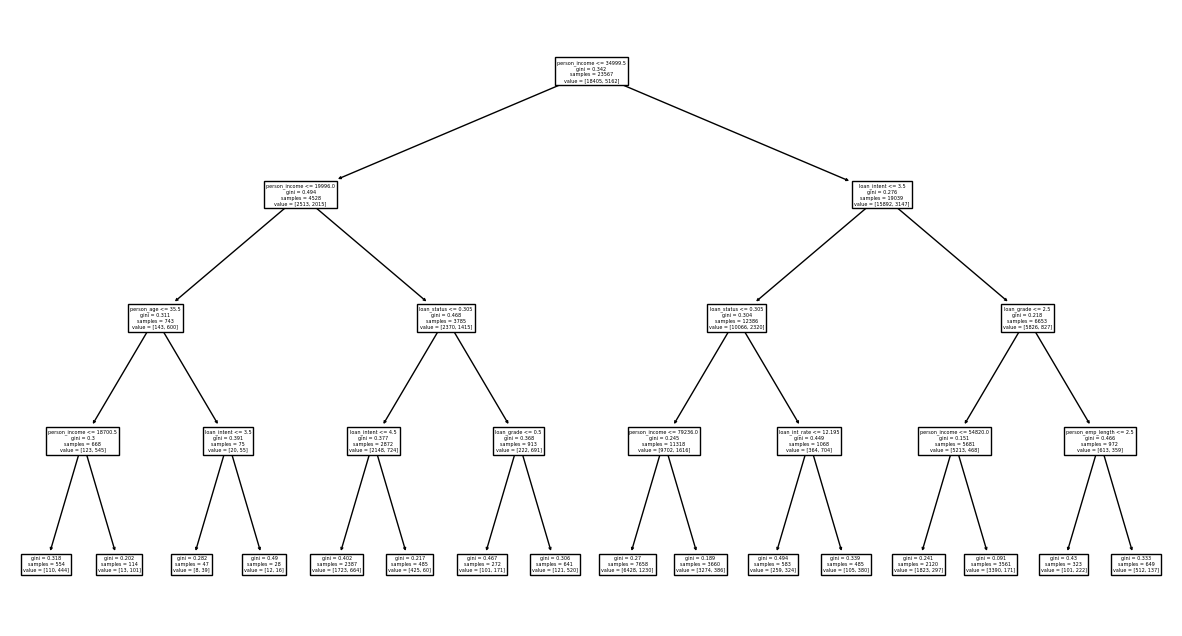

In [21]:
# split the Data into train and test data
X = credit_data.drop("loan_status", axis = 1)
Y = credit_data["loan_status"]

# 80% of the data will be used for training and 20$ for testing
# the 'random_state' ebsures that the splits are reproducible
feature_train, feature_test, target_train, target_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

# initialize the decision tree classifier
# - 'max_depth' limits the depth of the tree
# - 'min_sample_split' is the minimum number of samples required to split an internal node.
# - 'min_sample_leaf' is the minimum number of samples required to be at a leaf node.
# - 'max_features' determines the number of features to consider when looking for the best split; here, it's the square root of the number of features.
clf = DecisionTreeClassifier(
        max_depth=4, 
        min_samples_split=20, 
        min_samples_leaf=10, 
        max_features='sqrt')

# fit the model using the training data
clf.fit(feature_train, target_train)

# predicted the "loan_status" for the testing set
predictions = clf.predict(feature_test)

# calculate the accuracy of the model
print("Accuracy", accuracy_score(target_test, predictions))

# plot the decision tree
feature = list(credit_data.columns)
plt.figure(figsize=(15, 8))
tree.plot_tree(clf, feature_names= feature)

In [22]:
# to realize which feature mostly affect our target variable(loan_status), extracting feature importances
importances = clf.feature_importances_

# created a list of feature name, excluding "loan_status"
test_columns_list = credit_data.columns.drop("loan_status")

# iterate over the feature importances
importance_list = []
for i, importance in enumerate(importances):
    print(f"{test_columns_list[i]}: {importance}")
    importance_list.append(importance)

person_age: 0.00044811516124107286
person_income: 0.41218576650815864
person_home_ownership: 0.0
person_emp_length: 0.047714206455768175
loan_intent: 0.027286057923216814
loan_grade: 0.07288749519308237
loan_amnt: 0.0
loan_int_rate: 0.013398474014982023
loan_percent_income: 0.4260798847435509
cb_person_default_on_file: 0.0
cb_person_cred_hist_length: 0.0


In [23]:
# created the dataframe for creating the bar chart to compare which feature is more important
df_feature_importance = pd.DataFrame({"feature_name": test_columns_list, "importance": importance_list})  
sorted_df_feature_importance = df_feature_importance.sort_values("importance", ascending = True)
sorted_df_feature_importance

,feature_name,importance
2,person_home_ownership,0.000000
6,loan_amnt,0.000000
9,cb_person_default_on_file,0.000000
10,cb_person_cred_hist_length,0.000000
0,person_age,0.000448
7,loan_int_rate,0.013398
4,loan_intent,0.027286
3,person_emp_length,0.047714
5,loan_grade,0.072887
1,person_income,0.412186


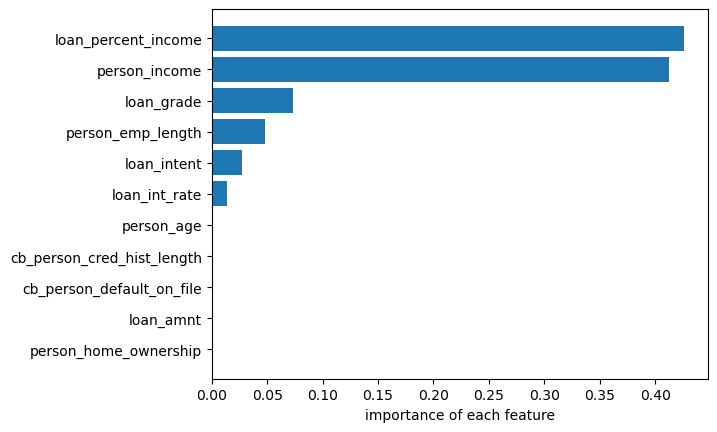

In [24]:
plt.barh(sorted_df_feature_importance["feature_name"], sorted_df_feature_importance["importance"])
plt.xlabel("importance of each feature");

## Conclusion

According to the bar chart of feature importance, financial institutions should emphasizethe proportion of income to loan, customers' income, and the grade of the loan when lending money to their customers. Furthermore, it is crucial for financial institutions to understand that the proportion of income to loan is a important factor and consider if they need to decrease the loan amount to their customers to avoid credit default.

However, I think this dataset requires additional information to make the analytics more accurate. For instance, we do not know how financial institutions evaluate the loan and determine the grade of the loan. Moreover, in this project, I use the label encoding method to convert categorical data variables, which helps the decision tree classifier work better. However, this is not an optimal approach because it may lead the machine learning model to interpret the numerical values as having a meaningful order. Moving forward, I will explore whether there are better ways to address this issue.